**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from ast import increment_lineno

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pprint import pprint

In [2]:
import pandas as pd
df = pd.read_csv("/Users/user/Documents/DM_LAB_3/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train_df, test_df = train_test_split(df,test_size_proportion = 0.2)
tree = decision_tree_algorithm(train_df)
accuracy = calculate_accuracy(test_df,tree)

NameError: name 'train_test_split' is not defined

In [5]:
df = df.drop("Id",axis=1)

In [6]:
df = df.rename(columns = {"Species":"label"})

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Train-Test-Split

In [8]:
def train_test_split(df,test_size):
  if isinstance(test_size,float):
    test_size = round(test_size*len(df))

  indices = df.index.tolist()
  test_indices = random.sample(population=indices,k=test_size)

  test_df = df.loc[test_indices]
  train_df = df.drop(test_indices)

  return train_df,test_df

In [9]:
random.seed(0)
train_df,test_df = train_test_split(df,test_size=0.1)

In [10]:
len(train_df)

135

In [11]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [13]:
data = train_df.values
data

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Iris-setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Iris-setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Iri

**Check Purity**

In [14]:
def check_purity(data):

  label_column = data[:,-1]
  unique_classes = np.unique(label_column)

  if len(unique_classes)==1:
    return True
  else:
    return False

In [15]:
check_purity(train_df[train_df.PetalWidthCm<0.8].values)

True

**Classification**

In [16]:
def classify(data):
  label_column = data[:,-1]
  unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

  index = counts_unique_classes.argmax()
  classification = unique_classes[index]

  return classification

In [17]:
classify(train_df[train_df.PetalWidthCm<0.8].values)

'Iris-setosa'

**Potential split**

In [18]:
def get_potential_splits(data):
  potential_splits = {}
  _, n_columns = data.shape
  for column_index in range(n_columns-1):
    potential_splits[column_index] = []
    values = data[:,column_index]
    unique_values = np.unique(values)

    for index in range(len(unique_values)):
      if index != 0:
        current_value = unique_values[index]
        previous_value = unique_values[index - 1]
        potential_split = (current_value + previous_value) / 2

        potential_splits[column_index].append(potential_split)

  return potential_splits


In [19]:
potential_splits = get_potential_splits(train_df.values)

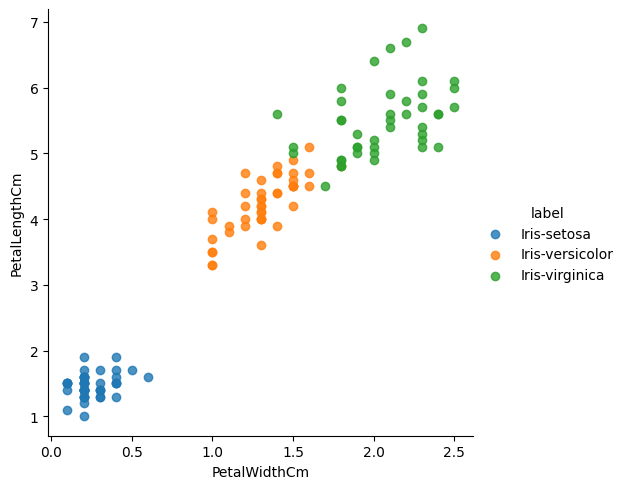

In [20]:
sns.lmplot(data=train_df,x="PetalWidthCm",y="PetalLengthCm",hue="label",fit_reg=False)

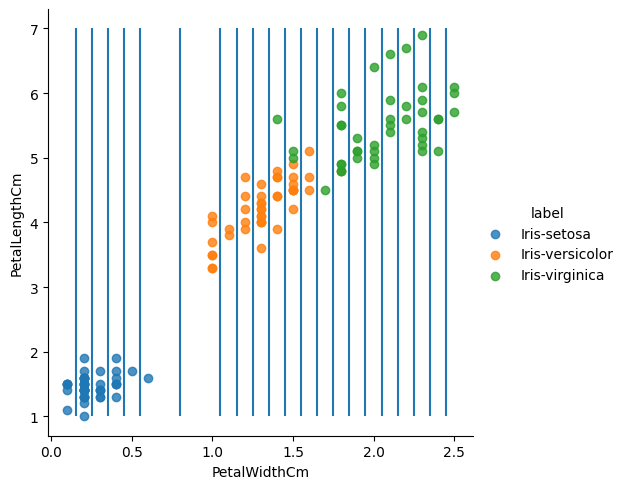

In [21]:
sns.lmplot(data=train_df,x="PetalWidthCm",y="PetalLengthCm",hue="label",fit_reg=False)

plt.vlines(x=potential_splits[3],ymin=1,ymax=7)
#plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

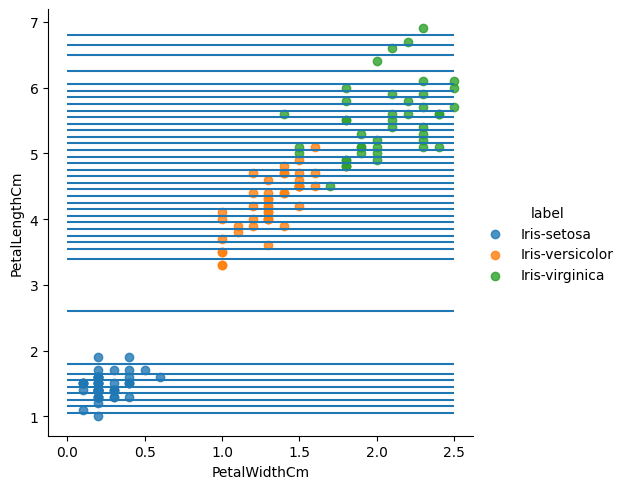

In [22]:
sns.lmplot(data=train_df,x="PetalWidthCm",y="PetalLengthCm",hue="label",fit_reg=False)

#plt.vlines(x=potential_splits[3],ymin=1,ymax=7)
plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

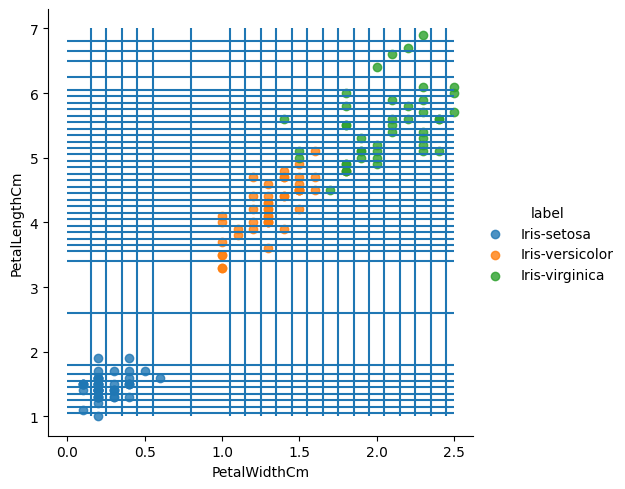

In [23]:
sns.lmplot(data=train_df,x="PetalWidthCm",y="PetalLengthCm",hue="label",fit_reg=False)

plt.vlines(x=potential_splits[3],ymin=1,ymax=7)
plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)

**Split data**

In [24]:
def split_data(data, split_column, split_value):

  split_column_values = data[:, split_column]

  data_below = data[split_column_values <= split_value]
  data_above = data[split_column_values > split_value]

  return data_below, data_above

**Lowest overall entropy**

In [25]:
def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

**Calculate overall entropy**

In [26]:
def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy

In [27]:
def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

In [29]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [30]:
tree = decision_tree_algorithm(train_df,max_depth=3)
pprint(tree)

{'PetalWidthCm <= 0.8': ['Iris-setosa',
                         {'PetalWidthCm <= 1.65': [{'PetalLengthCm <= 4.95': ['Iris-versicolor',
                                                                              'Iris-virginica']},
                                                   'Iris-virginica']}]}


**Classify some example**

In [31]:
example = test_df.iloc[2]
example

SepalLengthCm            5.4
SepalWidthCm             3.7
PetalLengthCm            1.5
PetalWidthCm             0.2
label            Iris-setosa
Name: 10, dtype: object

In [32]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    # ask question
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [33]:
classify_example(example,tree)

'Iris-setosa'

**Calculate accuracy**

In [34]:
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]

    accuracy = df["classification_correct"].mean()

    return accuracy

In [35]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.9333333333333333